In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('ProcessedHeart.csv')
X=df.drop('Target',axis=1)
Y=df.Target

from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5,n_estimators=100,random_state=25)
model.fit(X_train,Y_train)


yprediction=model.predict(X_test)
yprediction_prob=model.predict_proba(X_test)

In [4]:
yprediction_prob[:,1]

array([0.08156212, 0.37867961, 0.31933068, 0.69970878, 0.2739486 ,
       0.77942839, 0.52938245, 0.67189112, 0.89751464, 0.13777324,
       0.90777722, 0.20314191, 0.57799201, 0.85228958, 0.13347332,
       0.83201393, 0.11564915, 0.00808241, 0.67948091, 0.22921131,
       0.09015446, 0.81479181, 0.67012298, 0.873058  , 0.28896407,
       0.19373523, 0.01184017, 0.06406089, 0.91299838, 0.01337933,
       0.86622652, 0.21828104, 0.12319855, 0.23116588, 0.00714853,
       0.12310068, 0.78266931, 0.52272767, 0.84719231, 0.1965757 ,
       0.04792422, 0.19418969, 0.85778336, 0.51809312, 0.91372021,
       0.47178545, 0.53209534, 0.8031504 , 0.78075796, 0.35396224,
       0.55092675, 0.80390513, 0.0586415 , 0.17962464, 0.95413901,
       0.74566131, 0.83412653, 0.75460511, 0.00707001, 0.04313811,
       0.66263965])

In [5]:
yprediction_prob[:,1]>0.5

array([False, False, False,  True, False,  True,  True,  True,  True,
       False,  True, False,  True,  True, False,  True, False, False,
        True, False, False,  True,  True,  True, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
        True,  True,  True, False, False, False,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True,  True, False, False,  True])

In [6]:
yprediction

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [7]:
import shap
shap.initjs()

###### Calculate the shap value(~binary classification prediction results) of each data point in the testing data sets

In [8]:
explainer=shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [9]:
len(shap_values)

2

In [10]:
shap_values[0].shape

(61, 26)

In [12]:
shap_values[1].shape

(61, 26)

In [13]:
# percentage prob of disease or no disease
explainer.expected_value

array([0.42818182, 0.57181818])

In [15]:
explainer.expected_value[0]+explainer.expected_value[1]

0.9999999999999999

In [16]:
shap_values[1].sum(axis=1).shape

(61,)

In [17]:
yprediction_proba_shap = shap_values[1].sum(axis=1)+explainer.expected_value[1]

In [18]:
yprediction_proba_shap.shape

(61,)

In [19]:
yprediction_proba_shap

array([0.08156212, 0.37867961, 0.31933068, 0.69970878, 0.2739486 ,
       0.77942839, 0.52938245, 0.67189112, 0.89751464, 0.13777324,
       0.90777722, 0.20314191, 0.57799201, 0.85228958, 0.13347332,
       0.83201393, 0.11564915, 0.00808241, 0.67948091, 0.22921131,
       0.09015446, 0.81479181, 0.67012298, 0.873058  , 0.28896407,
       0.19373523, 0.01184017, 0.06406089, 0.91299838, 0.01337933,
       0.86622652, 0.21828104, 0.12319855, 0.23116588, 0.00714853,
       0.12310068, 0.78266931, 0.52272767, 0.84719231, 0.1965757 ,
       0.04792422, 0.19418969, 0.85778336, 0.51809312, 0.91372021,
       0.47178545, 0.53209534, 0.8031504 , 0.78075796, 0.35396224,
       0.55092675, 0.80390513, 0.0586415 , 0.17962464, 0.95413901,
       0.74566131, 0.83412653, 0.75460511, 0.00707001, 0.04313811,
       0.66263965])

In [21]:
model.predict_proba(X_test)[:,1]

array([0.08156212, 0.37867961, 0.31933068, 0.69970878, 0.2739486 ,
       0.77942839, 0.52938245, 0.67189112, 0.89751464, 0.13777324,
       0.90777722, 0.20314191, 0.57799201, 0.85228958, 0.13347332,
       0.83201393, 0.11564915, 0.00808241, 0.67948091, 0.22921131,
       0.09015446, 0.81479181, 0.67012298, 0.873058  , 0.28896407,
       0.19373523, 0.01184017, 0.06406089, 0.91299838, 0.01337933,
       0.86622652, 0.21828104, 0.12319855, 0.23116588, 0.00714853,
       0.12310068, 0.78266931, 0.52272767, 0.84719231, 0.1965757 ,
       0.04792422, 0.19418969, 0.85778336, 0.51809312, 0.91372021,
       0.47178545, 0.53209534, 0.8031504 , 0.78075796, 0.35396224,
       0.55092675, 0.80390513, 0.0586415 , 0.17962464, 0.95413901,
       0.74566131, 0.83412653, 0.75460511, 0.00707001, 0.04313811,
       0.66263965])

#### Feature Importance

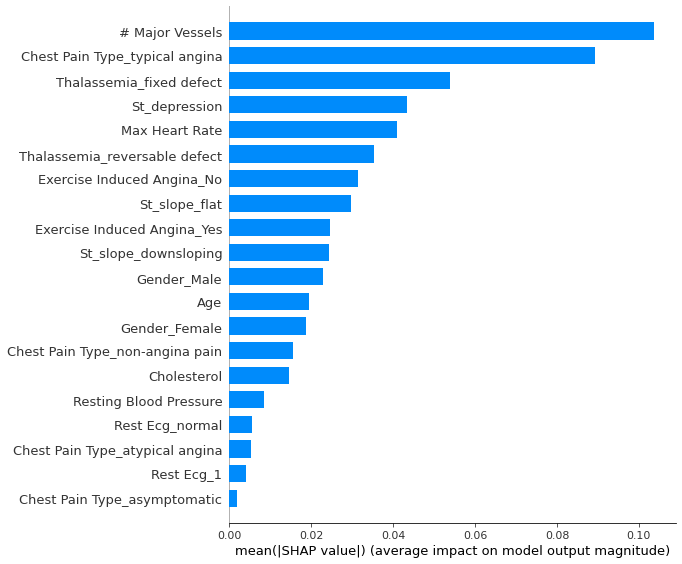

In [23]:
shap.summary_plot(shap_values[1],X_test,plot_type="bar")
# for each feature, calculate测试机美国病人的该特征shap值之和，shap值越高，特征越重要

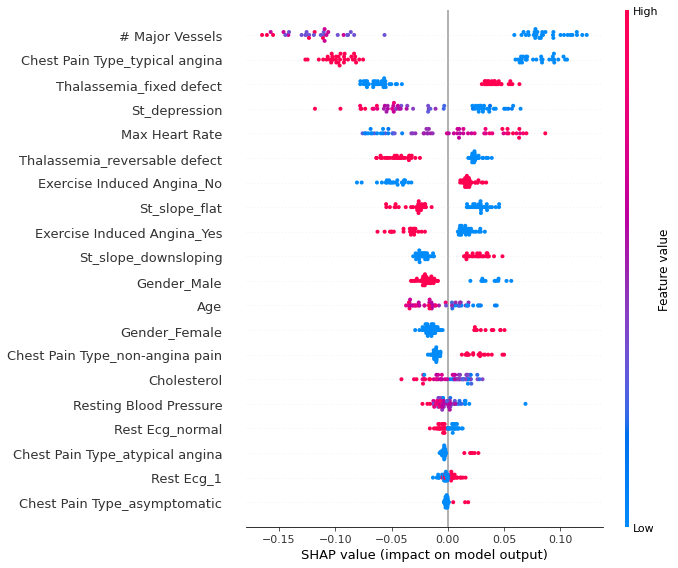

In [24]:
#各特征的数值大小和各特征的shap值关系
#每行即一共特征，红色：该特征的值较高的数据点，蓝色反之
#越靠右的点表示shap值越大，这个特征对预测为"患病"的正向影响越高

shap.summary_plot(shap_values[1],X_test)

# # Major Vessels越大，对预测为患病结果的正向贡献越小
# Max Heart Rate越大，对预测为患病结果的正向贡献越大

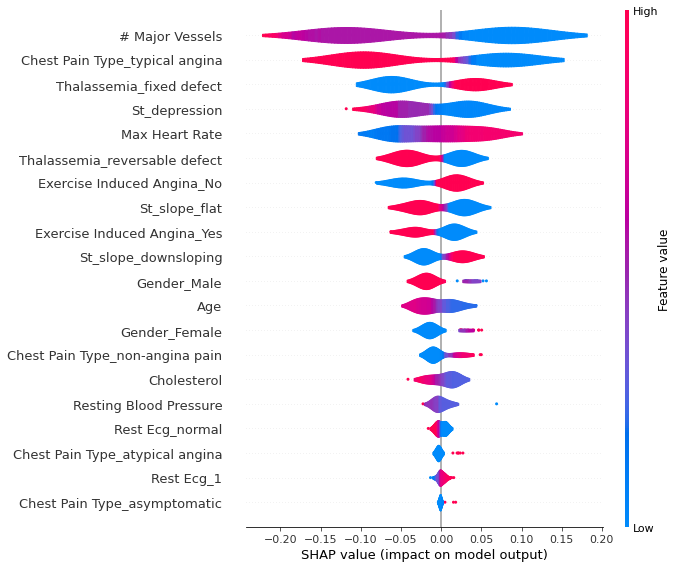

In [25]:
shap.summary_plot(shap_values[1],X_test,plot_type="violin")

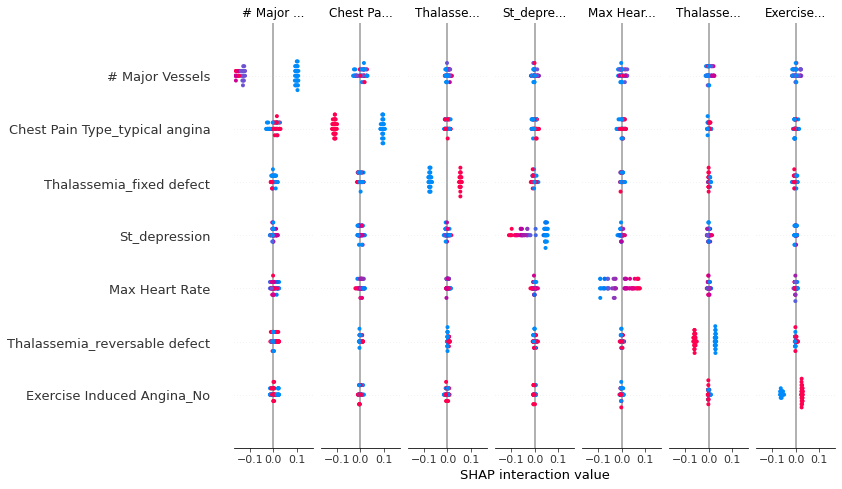

In [27]:
shap_interaction_values=explainer.shap_interaction_values(X_test)
shap.summary_plot(shap_interaction_values[1],X_test)

##### for one particular patient

In [28]:
X_test.head(10)

Age  Resting Blood Pressure  Cholesterol  Max Heart Rate  St_depression  \
246   56                     134          409             150            1.9   
183   58                     112          230             165            2.5   
229   64                     125          309             131            1.8   
126   47                     112          204             143            0.1   
184   50                     150          243             128            2.6   
1     37                     130          250             187            3.5   
59    57                     128          303             159            0.0   
194   60                     140          185             155            3.0   
132   42                     120          295             162            0.0   
175   40                     110          167             114            2.0   

     # Major Vessels  Gender_Female  Gender_Male  \
246                2              1            0   
183                1              0            1   
229                0              0            1   
126                0              0            1   
184                0              0            1   
1                  0              0            1   
59                 1              1            0   
194                0              0            1   
132                0              0            1   
175                0              0            1   

     Chest Pain Type_asymptomatic  Chest Pain Type_atypical angina  ...  \
246                             0                                0  ...   
183                             0                                0  ...   
229                             0                                0  ...   
126                             0                                0  ...   
184                             0                                0  ...   
1                               0                                0  ...   
59                              0                                0  ...   
194                             0                                0  ...   
132                             0                                1  ...   
175                             0                                0  ...   

     Rest Ecg_normal  Exercise Induced Angina_No  Exercise Induced Angina_Yes  \
246                1                           0                            1   
183                1                           1                            0   
229                0                           0                            1   
126                0                           1                            0   
184                1                           1                            0   
1                  0                           1                            0   
59                 1                           1                            0   
194                1                           1                            0   
132                0                           1                            0   
175                1                           0                            1   

     St_slope_downsloping  St_slope_flat  St_slope_unsloping  \
246                     0              1                   0   
183                     0              1                   0   
229                     0              1                   0   
126                     1              0                   0   
184                     0              1                   0   
1                       0              0                   1   
59                      1              0                   0   
194                     0              1                   0   
132                     1              0                   0   
175                     0              1                   0   

     Thalassemia_fixed defect  Thalassemia_normal  \
246                         0                   0   
183                   

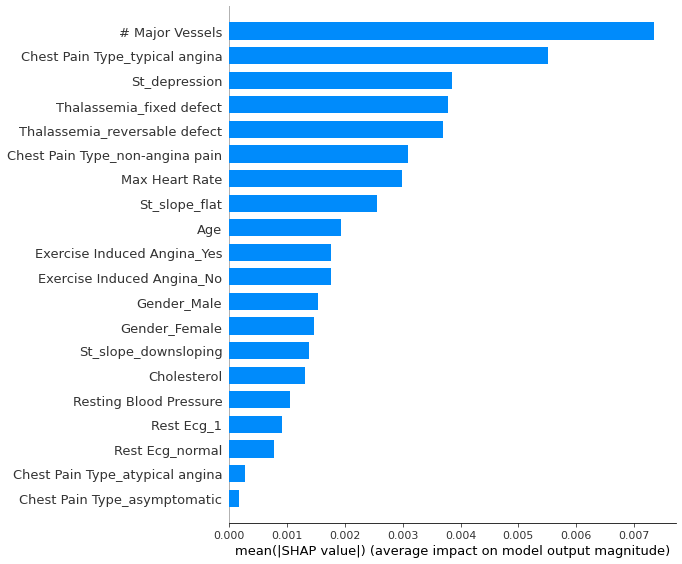

In [37]:
idx=183
patient=X.iloc[idx,:]
shap.summary_plot(shap_interaction_values[1][1],X_test,plot_type="bar")

In [31]:
shap_

Age  Resting Blood Pressure  Cholesterol  Max Heart Rate  St_depression  \
246   56                     134          409             150            1.9   
183   58                     112          230             165            2.5   
229   64                     125          309             131            1.8   
126   47                     112          204             143            0.1   
184   50                     150          243             128            2.6   
..   ...                     ...          ...             ...            ...   
277   57                     124          261             141            0.3   
121   59                     138          271             182            0.0   
187   54                     124          266             109            2.2   
301   57                     130          131             115            1.2   
283   40                     152          223             181            0.0   

     # Major Vessels  Gender_Female  Gender_Male  \
246                2              1            0   
183                1              0            1   
229                0              0            1   
126                0              0            1   
184                0              0            1   
..               ...            ...          ...   
277                0              0            1   
121                0              0            1   
187                1              0            1   
301                1              0            1   
283                0              0            1   

     Chest Pain Type_asymptomatic  Chest Pain Type_atypical angina  ...  \
246                             0                                0  ...   
183                             0                                0  ...   
229                             0                                0  ...   
126                             0                                0  ...   
184                             0                                0  ...   
..                            ...                              ...  ...   
277                             0                                1  ...   
121                             0                                0  ...   
187                             0                                0  ...   
301                             0                                0  ...   
283                             0                                0  ...   

     Rest Ecg_normal  Exercise Induced Angina_No  Exercise Induced Angina_Yes  \
246                1                           0                            1   
183                1                           1                            0   
229                0                           0                            1   
126                0                           1                            0   
184                1                           1                            0   
..               ...                         ...                          ...   
277                0                           1                            0   
121                1                           1                            0   
187                1                           0                            1   
301                0                           0                            1   
283                0                           1                            0   

     St_slope_downsloping  St_slope_flat  St_slope_unsloping  \
246                     0              1                   0   
183                     0              1                   0   
229                     0              1                   0   
126                     1              0                   0   
184                     0              1                   0   
..                    ...            ...                 ...   
277                     1              0                   0   
121                     1        

In [38]:
shap_values_patient=explainer.shap_values(patient)

In [39]:
shap_values_patient

[array([ 2.58585782e-02, -1.50627618e-02, -8.25732495e-03, -6.41260615e-02,
         4.94677229e-02,  1.44407524e-01,  1.70753144e-02,  2.03336861e-02,
         3.37797822e-04,  3.03907639e-03, -2.85180123e-02, -9.81280050e-02,
        -1.20654651e-03, -3.31867301e-04,  2.98133680e-03, -9.14243560e-05,
         8.41418330e-03, -1.52983608e-02, -8.89865843e-03,  2.56049838e-02,
         4.63151181e-02, -7.85856382e-04,  5.62169328e-02, -5.31534358e-04,
         3.44100910e-02, -8.73577893e-05]),
 array([-2.58585782e-02,  1.50627618e-02,  8.25732495e-03,  6.41260615e-02,
        -4.94677229e-02, -1.44407524e-01, -1.70753144e-02, -2.03336861e-02,
        -3.37797822e-04, -3.03907639e-03,  2.85180123e-02,  9.81280050e-02,
         1.20654651e-03,  3.31867301e-04, -2.98133680e-03,  9.14243560e-05,
        -8.41418330e-03,  1.52983608e-02,  8.89865843e-03, -2.56049838e-02,
        -4.63151181e-02,  7.85856382e-04, -5.62169328e-02,  5.31534358e-04,
        -3.44100910e-02,  8.73577893e-05])]

In [40]:
shap_values_patient[0]
# 该病人各特征对“不患心脏病”预测结果的shap值

array([ 2.58585782e-02, -1.50627618e-02, -8.25732495e-03, -6.41260615e-02,
        4.94677229e-02,  1.44407524e-01,  1.70753144e-02,  2.03336861e-02,
        3.37797822e-04,  3.03907639e-03, -2.85180123e-02, -9.81280050e-02,
       -1.20654651e-03, -3.31867301e-04,  2.98133680e-03, -9.14243560e-05,
        8.41418330e-03, -1.52983608e-02, -8.89865843e-03,  2.56049838e-02,
        4.63151181e-02, -7.85856382e-04,  5.62169328e-02, -5.31534358e-04,
        3.44100910e-02, -8.73577893e-05])

In [42]:
shap_values_patient[1]
# 该病人各特征对“患心脏病”预测结果的shap值

array([-2.58585782e-02,  1.50627618e-02,  8.25732495e-03,  6.41260615e-02,
       -4.94677229e-02, -1.44407524e-01, -1.70753144e-02, -2.03336861e-02,
       -3.37797822e-04, -3.03907639e-03,  2.85180123e-02,  9.81280050e-02,
        1.20654651e-03,  3.31867301e-04, -2.98133680e-03,  9.14243560e-05,
       -8.41418330e-03,  1.52983608e-02,  8.89865843e-03, -2.56049838e-02,
       -4.63151181e-02,  7.85856382e-04, -5.62169328e-02,  5.31534358e-04,
       -3.44100910e-02,  8.73577893e-05])

In [43]:
# 两组shap值互为相反数，和为0
shap_values_patient[0]+shap_values_patient[1]

array([ 1.04083409e-17, -1.73472348e-18, -5.20417043e-18,  0.00000000e+00,
        2.77555756e-17,  1.94289029e-16, -3.46944695e-18, -1.38777878e-17,
        3.25260652e-19, -4.33680869e-19, -1.04083409e-17, -2.77555756e-17,
       -2.16840434e-19,  1.62630326e-19, -1.30104261e-18, -3.11708125e-19,
       -3.46944695e-18,  0.00000000e+00,  8.67361738e-18,  1.04083409e-17,
       -2.08166817e-17,  1.08420217e-19,  3.46944695e-17,  2.16840434e-19,
        6.93889390e-18, -5.01443505e-19])

In [46]:
shap.force_plot(explainer.expected_value[1],shap_values_patient[1],patient)

In [69]:
# idx=183
# patient=X.loc[idx,:]
# shap_values_patient=explainer.shap_values(patient)
# shap.waterfall_plot(explainer.expected_value[1],shap_values_patient[1],patient)

In [51]:
idx=183
patient=X.iloc[idx,:]
patient_df=X.loc[idx:idx]
model_predict_proba=model.predict_proba(patient_df)[0][1]
print('{}号别人的真实标签时{}，模型预测为{:2f}'.format(idx,bool(Y_test[idx]),model_predict_proba))

shap_values_patient=explainer.shap_values(patient)
shap.force_plot(explainer.expected_value[1],shap_values_patient[1],patient)

183号别人的真实标签时False，模型预测为0.378680


#### Summary Plot

In [55]:
number_show=60
shap_values_summary = explainer.shap_values(X_train.iloc[:number_show])
shap.force_plot(explainer.expected_value[1],shap_values_summary[1],X_test.iloc[:number_show])

#### Dependence Plot

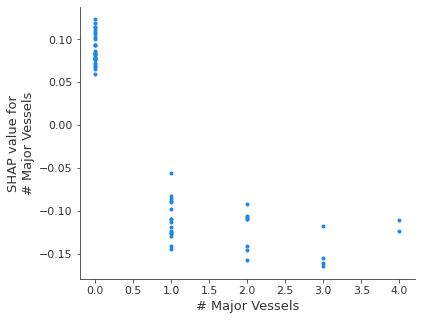

In [57]:
shap.dependence_plot("# Major Vessels",shap_values[1],X_test,interaction_index=None)

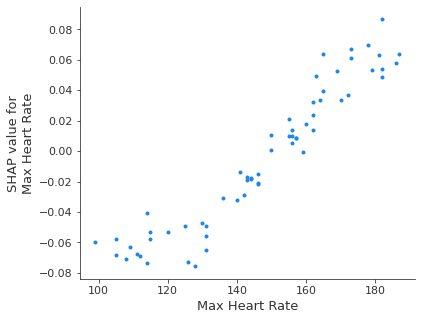

In [58]:
shap.dependence_plot("Max Heart Rate",shap_values[1],X_test,interaction_index=None)

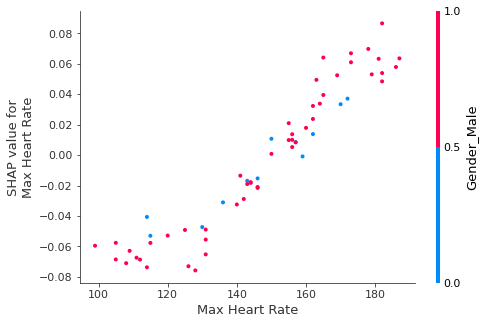

In [59]:
shap.dependence_plot("Max Heart Rate",shap_values[1],X_test,interaction_index="Gender_Male")

#### Partial Dependence Plot

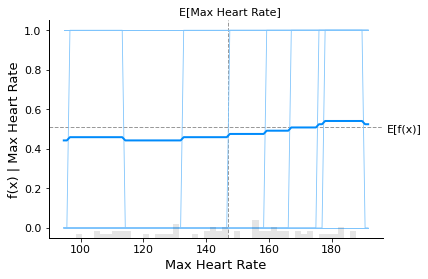

In [60]:
shap.partial_dependence_plot("Max Heart Rate",model.predict,X_test,
                             model_expected_value=True,feature_expected_value=True)

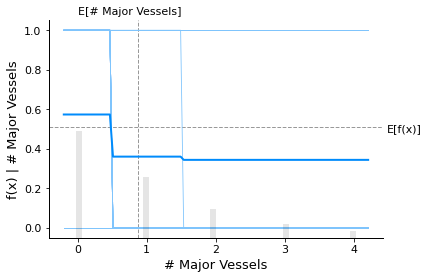

In [61]:
shap.partial_dependence_plot("# Major Vessels",model.predict,X_test,
                             model_expected_value=True,feature_expected_value=True)

#### Decision Plot

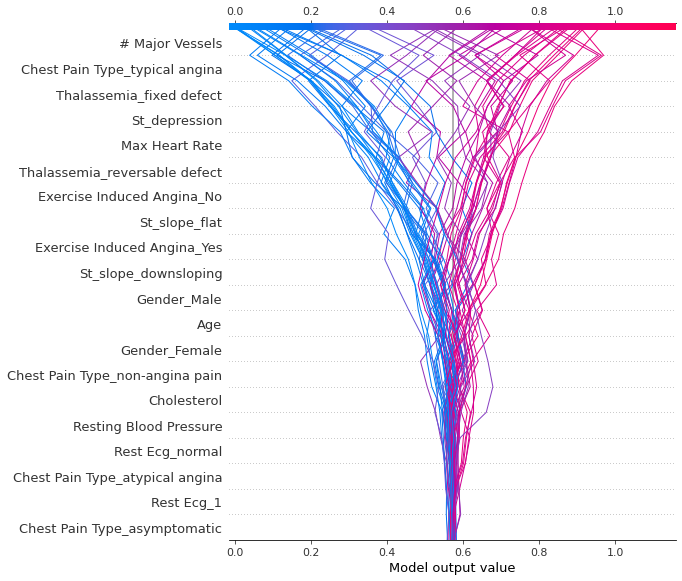

In [73]:
shap.decision_plot(explainer.expected_value[1],shap_values[1],X_test)

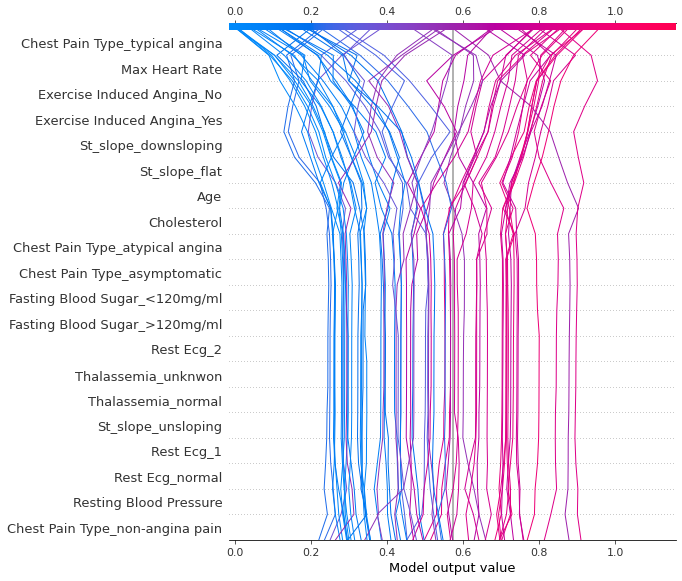

In [74]:
# 查看典型决策路径与异常点
shap.decision_plot(explainer.expected_value[1],shap_values[1],X_test,feature_order="hclust")

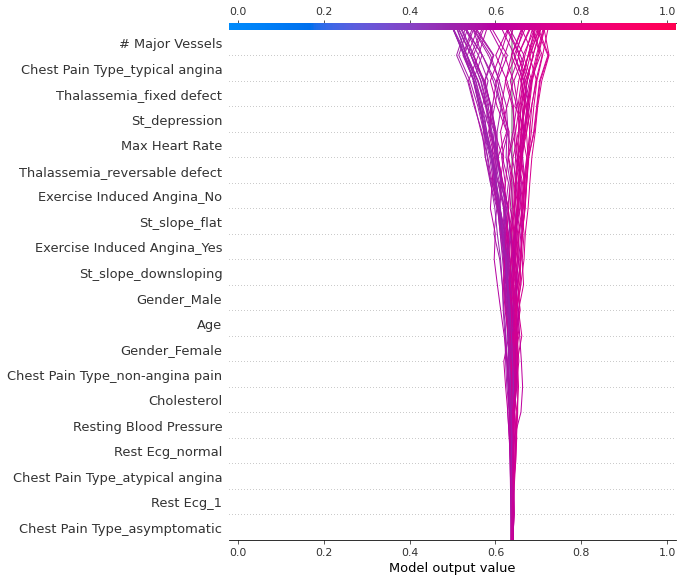

In [75]:
# 对数几率缩放变换
shap.decision_plot(explainer.expected_value[1],shap_values[1],X_test,link="logit")

索引号为25的样本，在原始数据集X中的索引号为240


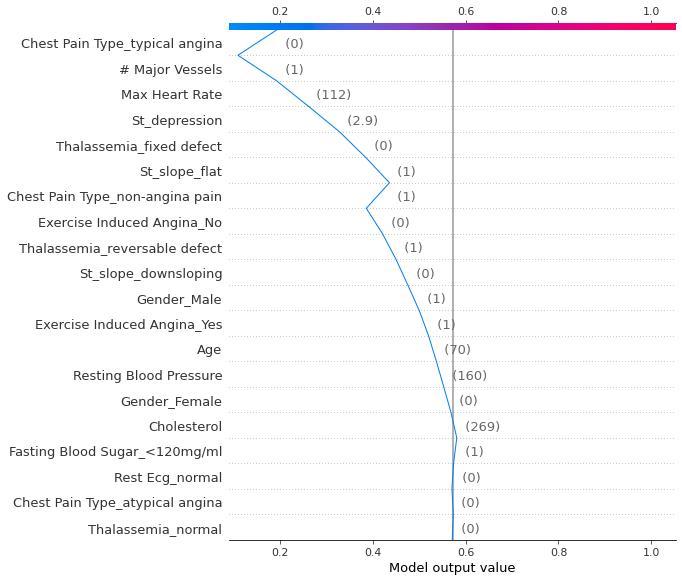

In [77]:
#### Decision plot for a single data point
idx=25
selection=np.zeros((61))
selection[idx]=1
selection=selection>0

print('索引号为{}的样本，在原始数据集X中的索引号为{}'.format(idx,X_test.iloc[idx:idx+1].index[0]))

shap.decision_plot(explainer.expected_value[1],shap_values[1][selection],X_test[selection])

#### 自定义决策图特征显示顺序

In [78]:
X_test.shape

(61, 26)

In [79]:
feature_idx = [i for i in range(26)]

In [80]:
feature_idx

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

索引号为25的样本，在原始数据集X中的索引号为240


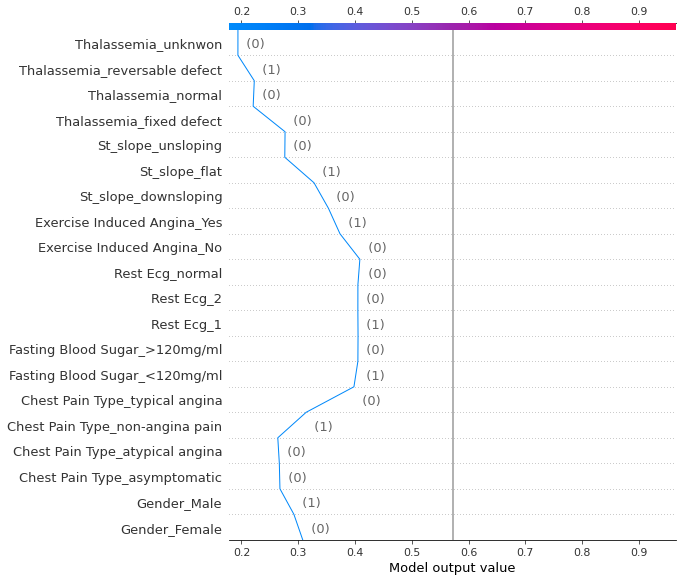

In [81]:
idx=25
selection=np.zeros((61))
selection[idx]=1
selection=selection>0

print('索引号为{}的样本，在原始数据集X中的索引号为{}'.format(idx,X_test.iloc[idx:idx+1].index[0]))

shap.decision_plot(explainer.expected_value[1],shap_values[1][selection],X_test[selection],feature_order=feature_idx)

#### Find data that got wrong prediction

In [88]:
misclassified = yprediction!=Y_test
misclassified_df = pd.DataFrame({'Whether wrongly predicted':misclassified})

In [89]:
misclassified_df

Whether wrongly predicted
246                      False
183                      False
229                      False
126                      False
184                      False
..                         ...
277                       True
121                      False
187                      False
301                      False
283                       True

[61 rows x 1 columns]

In [90]:
misclassified_df = misclassified_df[misclassified_df['Whether wrongly predicted']==True]

In [92]:
misclassified_df

Whether wrongly predicted
194                       True
296                       True
139                       True
287                       True
52                        True
138                       True
270                       True
188                       True
259                       True
106                       True
173                       True
277                       True
283                       True

In [93]:
misclassified_df.shape

(13, 1)

In [94]:
idx=194
patient=X.iloc[idx,:]
patient_df=X.loc[idx:idx]
model_predict_proba=model.predict_proba(patient_df)[0][1]
print('{}号别人的真实标签时{}，模型预测为{:2f}'.format(idx,bool(Y_test[idx]),model_predict_proba))

shap_values_patient=explainer.shap_values(patient)
shap.force_plot(explainer.expected_value[1],shap_values_patient[1],patient)

194号别人的真实标签时False，模型预测为0.671891


In [95]:
idx=139
patient=X.iloc[idx,:]
patient_df=X.loc[idx:idx]
model_predict_proba=model.predict_proba(patient_df)[0][1]
print('{}号别人的真实标签时{}，模型预测为{:2f}'.format(idx,bool(Y_test[idx]),model_predict_proba))

shap_values_patient=explainer.shap_values(patient)
shap.force_plot(explainer.expected_value[1],shap_values_patient[1],patient)

139号别人的真实标签时True，模型预测为0.090154


#### Display wrong predictions in Decision Plot

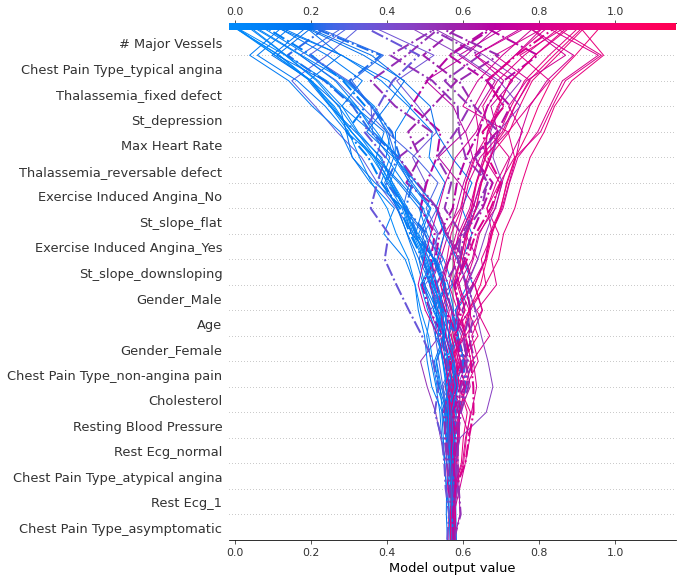

In [97]:
shap.decision_plot(explainer.expected_value[1],shap_values[1],X_test,highlight=misclassified)

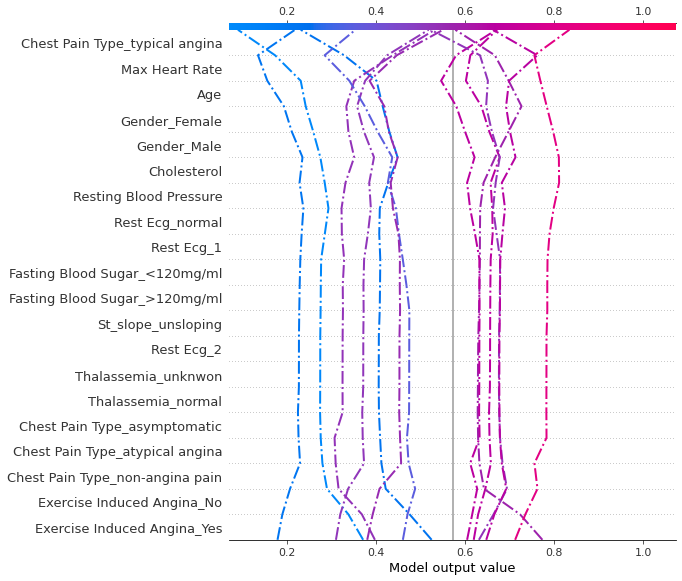

In [98]:
shap.decision_plot(explainer.expected_value[1],shap_values[1][misclassified],X_test[misclassified],
                  highlight=range(len(misclassified_df)),feature_order='hclust')

### 两两交互特征对预测结果影响

###### 主对角线的图与summary plot相同
###### 其它的图中，红色表示两个特征的值都比较高，蓝色表示两个特征的值都较低
###### 每个图里，越靠右的点表示这一对两两交互特征对预测为"患病"的结果有正向影响

In [100]:
shap_interaction_values=explainer.shap_interaction_values(X_test)
shap_interaction_values[1].shape

(61, 26, 26)

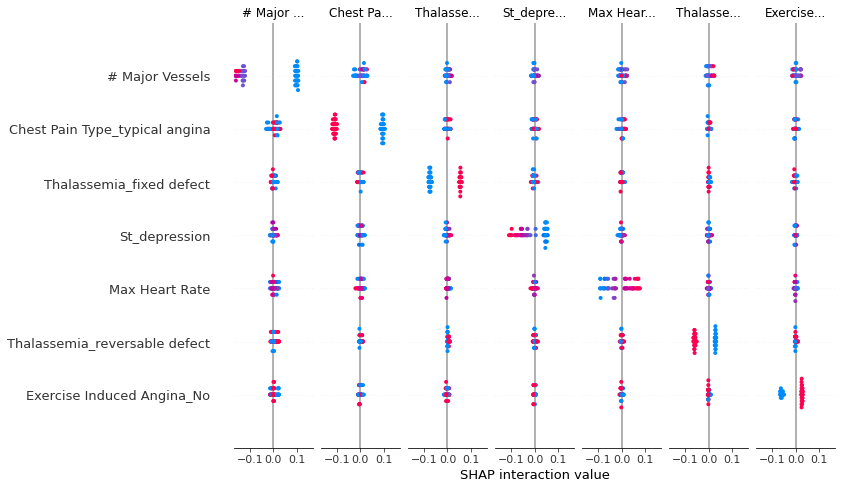

In [101]:
shap.summary_plot(shap_interaction_values[1],X_test)

In [103]:
shap_interaction_values[1][5].shape

(26, 26)

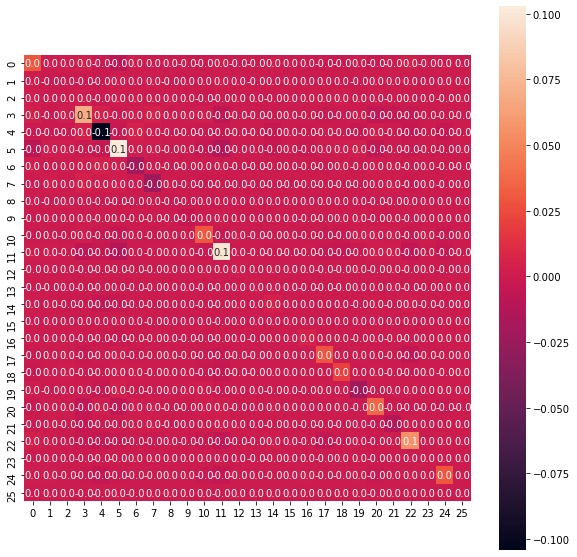

In [104]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(shap_interaction_values[1][5],annot=True,fmt='.1f',square=True)
plt.show()

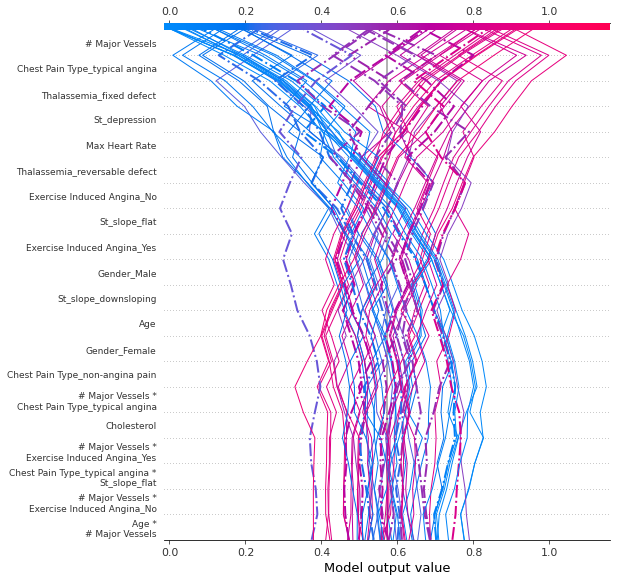

In [105]:
#考虑两两交互特征的决策图
shap.decision_plot(explainer.expected_value[1],shap_interaction_values[1],X_test,highlight=misclassified)

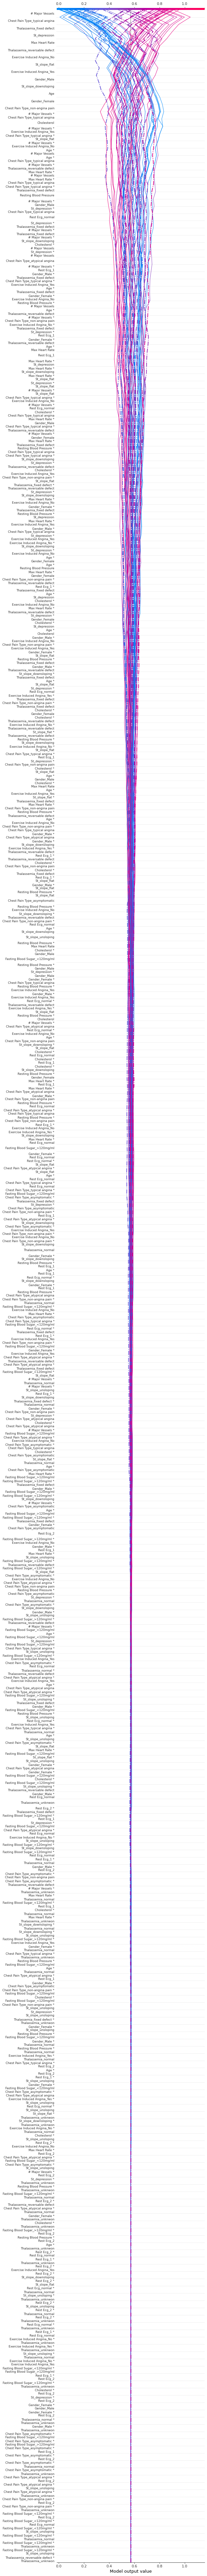

In [106]:
# if too many features, could use featre_display_range to adjust number of features to display
# slice(None, -101,-1) is displaying 100 features
# slice(None,None,-1) is displaying all features

shap.decision_plot(explainer.expected_value[1],shap_interaction_values[1],X_test,highlight=misclassified,
                  feature_display_range=slice(None,None,-1),ignore_warnings=True)


索引号为24的样本，在原始数据集X中的索引号为202


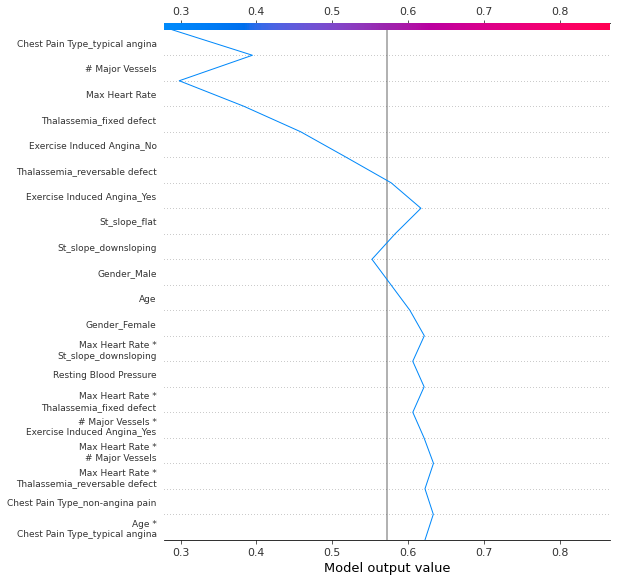

In [110]:
#考虑两两交互特征的单个样本决策图
idx=24
selection=np.zeros((61))
selection[idx]=1
selection=selection>0

print('索引号为{}的样本，在原始数据集X中的索引号为{}'.format(idx,X_test.iloc[idx:idx+1].index[0]))

shap.decision_plot(explainer.expected_value[1],shap_interaction_values[1][selection],X_test[selection])


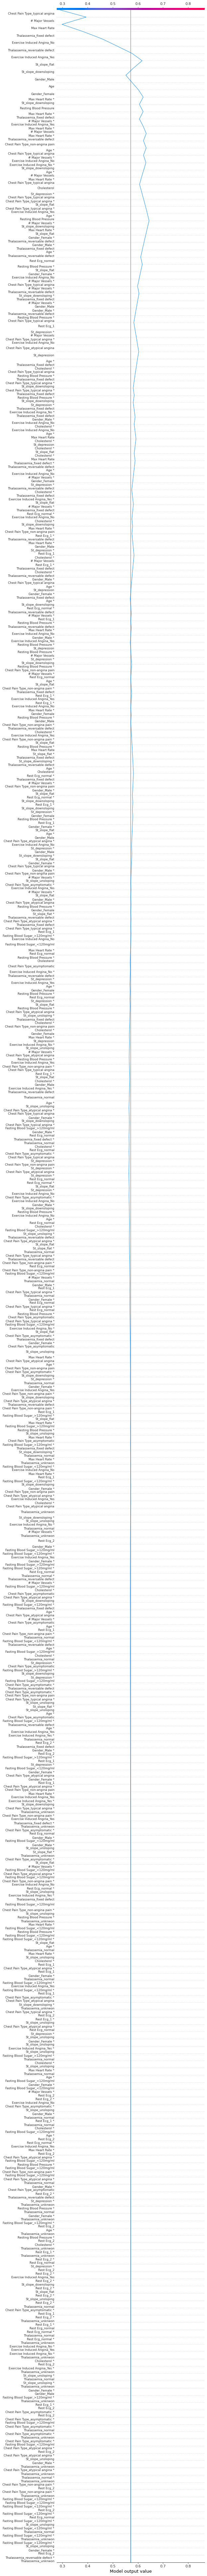

In [112]:
shap.decision_plot(explainer.expected_value[1],shap_interaction_values[1][selection],X_test[selection],
                  feature_display_range=slice(None,None,-1),ignore_warnings=True)

In [113]:
# 25号病人某一特征变化对模型分类结果的影响
idx=25
X_test.loc[idx]

Age                                 71.0
Resting Blood Pressure             160.0
Cholesterol                        302.0
Max Heart Rate                     162.0
St_depression                        0.4
# Major Vessels                      2.0
Gender_Female                        1.0
Gender_Male                          0.0
Chest Pain Type_asymptomatic         0.0
Chest Pain Type_atypical angina      1.0
Chest Pain Type_non-angina pain      0.0
Chest Pain Type_typical angina       0.0
Fasting Blood Sugar_<120mg/ml        1.0
Fasting Blood Sugar_>120mg/ml        0.0
Rest Ecg_1                           1.0
Rest Ecg_2                           0.0
Rest Ecg_normal                      0.0
Exercise Induced Angina_No           1.0
Exercise Induced Angina_Yes          0.0
St_slope_downsloping                 1.0
St_slope_flat                        0.0
St_slope_unsloping                   0.0
Thalassemia_fixed defect             1.0
Thalassemia_normal                   0.0
Thalassemia_reve

In [114]:
print('索引号为{}的样本，在原始数据集X中的索引号为{}'.format(idx,X_test.iloc[idx:idx+1].index[0]))


索引号为25的样本，在原始数据集X中的索引号为240


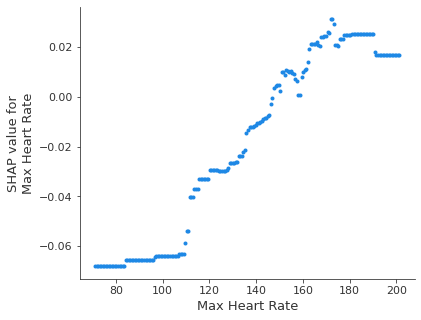

In [115]:
feature_selected='Max Heart Rate'
sep=200
feature_selected_min = X[feature_selected].min()
feature_selected_max = X[feature_selected].max()
step=(feature_selected_max-feature_selected_min)/sep
rg=np.arange(feature_selected_min,feature_selected_max,step)
R=X.iloc[np.repeat(idx,len(rg))].reset_index(drop=True)
R[feature_selected]=rg
hypothetical_shap_values=explainer.shap_values(R)[1]
shap.dependence_plot(feature_selected,hypothetical_shap_values,R,interaction_index=None)

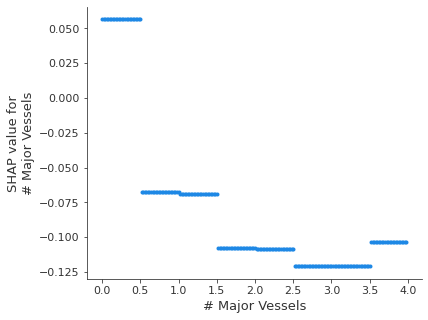

In [116]:
feature_selected='# Major Vessels'
sep=200
feature_selected_min = X[feature_selected].min()
feature_selected_max = X[feature_selected].max()
step=(feature_selected_max-feature_selected_min)/sep
rg=np.arange(feature_selected_min,feature_selected_max,step)
R=X.iloc[np.repeat(idx,len(rg))].reset_index(drop=True)
R[feature_selected]=rg
hypothetical_shap_values=explainer.shap_values(R)[1]
shap.dependence_plot(feature_selected,hypothetical_shap_values,R,interaction_index=None)

In [117]:
# 某病人某特征变化决策图
hypothetical_shap_values.shape

(200, 26)

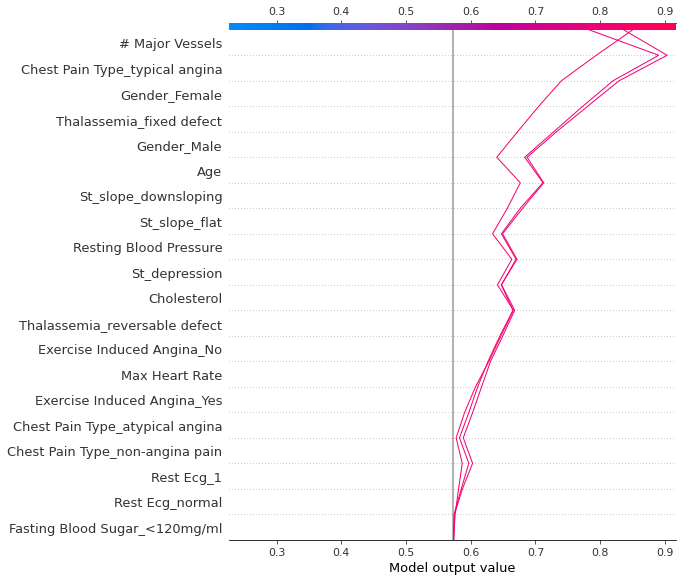

In [118]:
idx=25
shap.decision_plot(explainer.expected_value[1],hypothetical_shap_values[[0,50,99]],
                   X_test.iloc[idx],feature_order="importance")


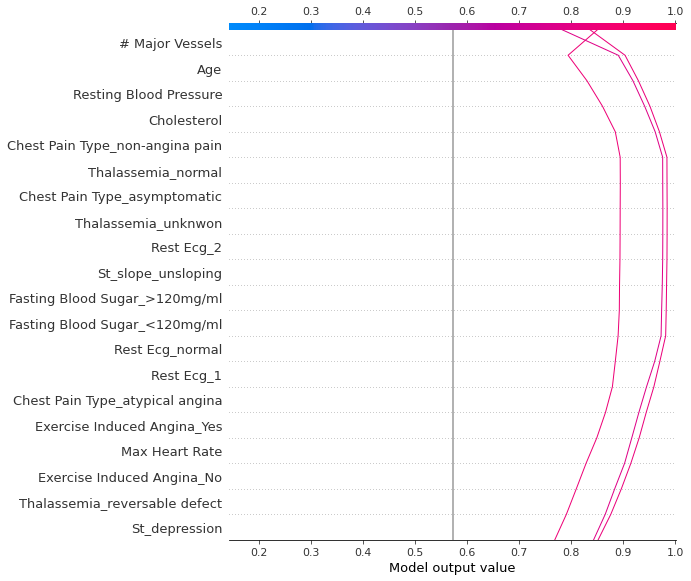

In [119]:
shap.decision_plot(explainer.expected_value[1],hypothetical_shap_values[[0,50,99]],
                   X_test.iloc[idx],feature_order="hclust")


#### find who sufer the most influence of st_depression

In [121]:
X_test['St_depression'].unique()

array([1.9, 2.5, 1.8, 0.1, 2.6, 3.5, 0. , 3. , 2. , 1. , 3.4, 1.4, 0.2,
       1.6, 0.8, 2.9, 2.2, 3.6, 1.5, 2.8, 0.4, 3.1, 0.6, 3.8, 3.2, 2.1,
       1.2, 0.3])

In [122]:
idx=np.argpartition(shap_values[1][:,X_test.columns.get_loc('St_depression')],2)

In [123]:
idx.shape

(61,)

In [124]:
idx

array([ 5, 46, 41,  3,  4,  0,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40,  2, 42, 43, 44, 45,  1, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60], dtype=int64)

In [126]:
# idx=5
# patient=X_test.iloc[idx,:]
# shap_values_patient=explainer.shap_values(patient)
# shap.waterfall_plot(explainer.expected_value[1],shap_values_patient[1],patient)

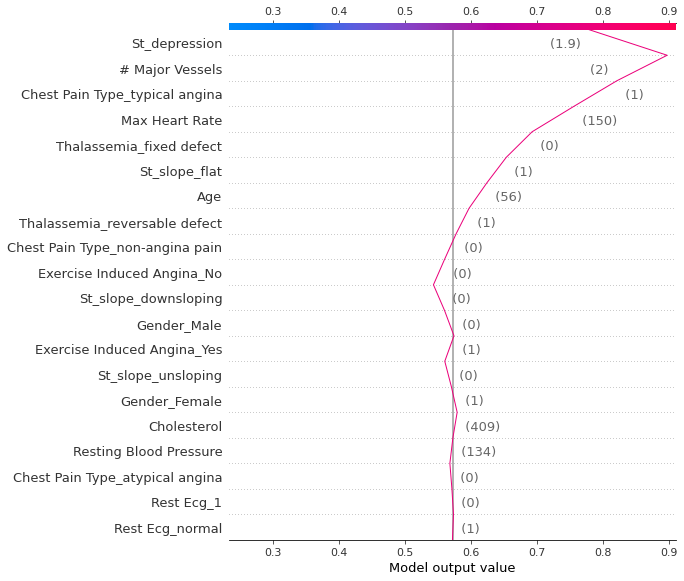

In [127]:
shap.decision_plot(explainer.expected_value[1],shap_values[1][5],
                   X_test,feature_order="importance")


#### change the base value of shap

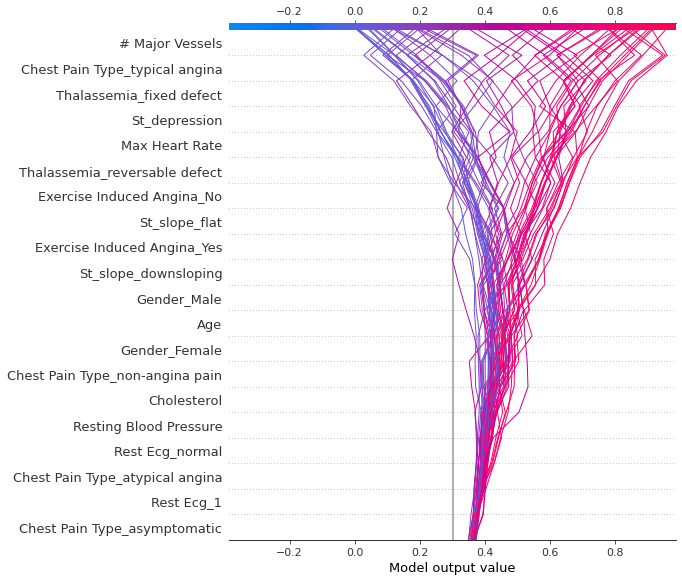

In [129]:
new_base_value=0.2
shap.decision_plot(explainer.expected_value[1],shap_values[1],X_test,new_base_value=0.3)

In [130]:
# 多模型集成时比较每个模型的决策曲线
# source: https://github.com/slundberg/shap/blob/master/notebooks/plots/decision_plot.ipynb